In [1]:
import warnings
warnings.filterwarnings("ignore")
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile # StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.svm import LinearSVC


# from sklearn import ?
# from sklearn.metrics import ?

In [2]:
#import missingno as msno

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [3]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

#승객 신상정보 바탕으로 생존여부 맞추기
#숫자로 바꿀만한 것들&값 조정할 것들: 성별, 나이, Cabin()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data_df.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic 형제자매 누가 같이 탔나
- **parch** : # of parents / children aboard the Titanic 부모 자식 같이 탔나
- **ticket** : Ticket number 티켓 일련번호
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) 나눠서 탔는지

각각의 열 쓸지말지 쓴다면 어떻게 가져가야할지 고민해보기
전처리해서 숫자형태로 바꿔주기

연속형 변수 파이프라인 스케일
범주형 변수 원핫인코딩

전처리 마치면 모델 후보 넣어보기
성능평가

regressor아님!!! 분류모델 사용하기
분류모델 성능평가지 표 ROC AOC

애톰스코어 등 시간나면 해보기

# Explore Data

- Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

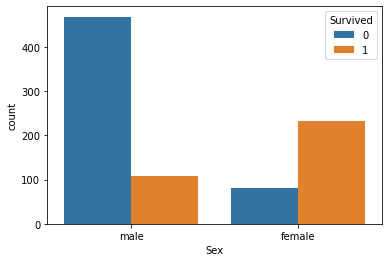

In [5]:
sns.countplot(data=data_df, x="Sex", hue="Survived")

In [6]:
pd.pivot_table(data_df, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


-> 여성인 경우 생존률이 남성인 경우보다 높다.

- Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

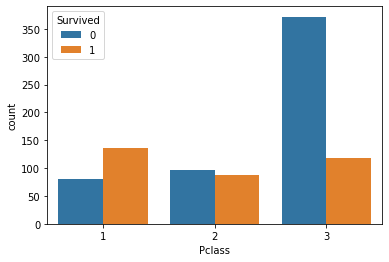

In [7]:
sns.countplot(data=data_df, x="Pclass", hue="Survived")

In [8]:
pd.pivot_table(data_df, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


-> 객실 등급이 높을수록 생존률이 높다

- Age

<AxesSubplot:xlabel='Sex', ylabel='Age'>

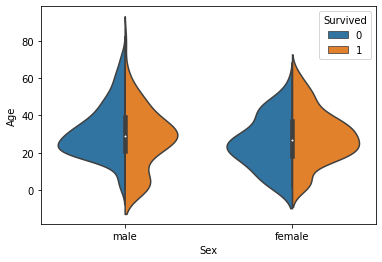

In [9]:

sns.violinplot(data=data_df, x="Sex", y='Age', hue="Survived", split = True)

-> 남자 아이의 경우에 생존률이 확연이 높았다. (데이터 수 체크 필요)
   
   여자 아이의 생존률은 그렇게 높지 않은듯하다.
   
   20 ~ 40대 여성 생존률, 노인 여성, 남자 아이 생존률이 높아 보인다.

- Sibsp & Parch

- **sibsp** : # of siblings & spouses aboard the Titanic 형제자매 누가 같이 탔나
- **parch** : # of parents / children aboard the Titanic 부모 자식 같이 탔나

<AxesSubplot:xlabel='SibSp', ylabel='count'>

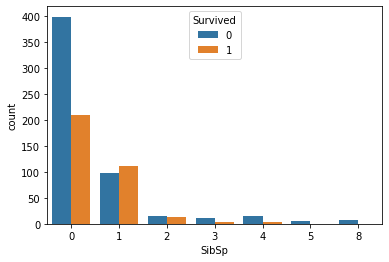

In [10]:
sns.countplot(data=data_df, x="SibSp", hue="Survived")

<AxesSubplot:xlabel='Parch', ylabel='count'>

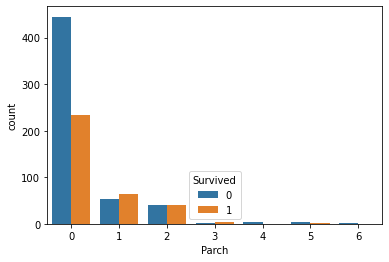

In [11]:
sns.countplot(data=data_df, x="Parch", hue="Survived")

In [12]:
pd.pivot_table(data_df, index="SibSp", values="Survived")
pd.pivot_table(data_df, index="Parch", values="Survived")

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [13]:
pd.pivot_table(data_df, index="Parch", values="Survived")

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


-> 혼자 탑승한 경우 / 대가족의 경우 생존 확률이 낮다.

-> 3가지 case로 분류하자

In [14]:
data_df["Family"] = data_df["SibSp"] + data_df["Parch"]

data_df[["SibSp", "Parch", "Family"]].head() #Family 칼럼 추가

,SibSp,Parch,Family
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


<AxesSubplot:xlabel='Parch', ylabel='count'>

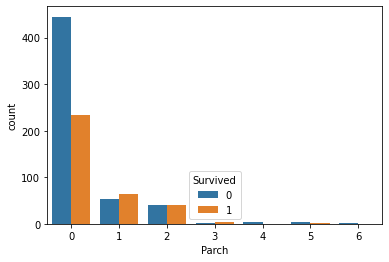

In [15]:
sns.countplot(data=data_df, x="Parch", hue="Survived")

In [16]:
pd.pivot_table(data_df, index="Family", values="Survived")

,Survived
Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


-> Family Size 0명 / 1명 ~ 3명  / 4명 이상 구간 나누기

- Fare

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

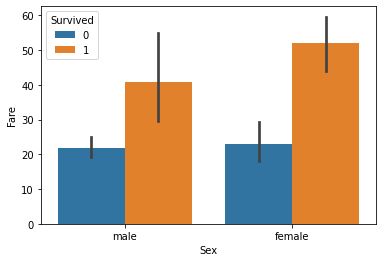

In [17]:
sns.barplot(data=data_df, x="Sex", y='Fare', hue="Survived")

-> 생존한 인원들의 경우 Fare의 금액이 상대적으로 높았다

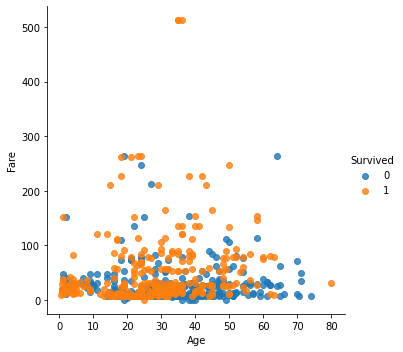

In [18]:
sns.lmplot(data=data_df, x="Age", y='Fare', hue="Survived", fit_reg=False)

- Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

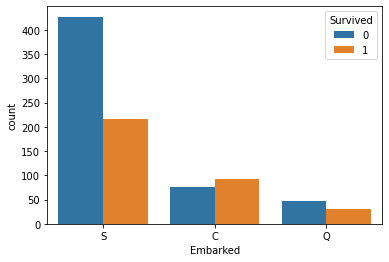

In [19]:
sns.countplot(data=data_df, x="Embarked", hue="Survived")

In [20]:
pd.pivot_table(data_df, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


-> C에서 탑승한 승객이 생존률이 높다, S에서 탑승한 승객의 생존률은 낮다.

   S에서 탑승한 승객이 가장 많다. C, Q에서 탑승한 승객은 S에 비하면 많이 적다

- Name

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기  exAge Fare 구간 나누기 1~5 등으로-->권장X 정보손실 생김
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기


Age열 값 있고 없고 분류해서  트레인 테스트로 쪼갬. (이해 안됨)
퍼셉트론, SGD 쓰지마

+ Model stacking 적용해보기
+ AutoML적용해보기(근데 구글은 1000개 행 이상이어야함. 나ㅓㅁ진느 복원추출해주기

In [21]:
# # 기본적인 결측치 채우는 방법(기본적)
# mean_age = x_data['Age'].median(skipna=True)
# x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

In [22]:
#msno.matrix(x_data, figsize=(12,5))

In [23]:
copy_df = data_df.copy()

In [24]:
#1. 필요없는 컬럼 제거: Ticket
copy_df = copy_df.drop(['Ticket'], axis=1)
copy_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0


In [25]:
#2. 성별 male=1 Female=0
def male_female(x):
    if x=="male":
        return 1
    elif x=="female":
        return 0
    
copy_df["Sex"] = copy_df["Sex"].apply(male_female)
copy_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C148,C,0


## Change Name

In [26]:
#이름으로 나이 예측

copy_df['other_name']=4
for i in copy_df:
    copy_df['other_name'] = copy_df.Name.str.extract('([A-Za-z]+)\.')

copy_df['other_name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: other_name, dtype: int64

In [27]:
copy_df['other_name'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Other','Other','Miss','Mr','Mrs','Mrs','Other','Other','Other','Other','Other','Other','Other'], inplace = True)

In [28]:
# 이름에 번호 부여
#Mr : 1
copy_df.loc[copy_df.other_name=='Mr','Name_Category']=0
#Mrs : 2
copy_df.loc[copy_df.other_name=='Mrs','Name_Category']=1
#Master : 3
copy_df.loc[copy_df.other_name=='Master','Name_Category']=2
#Miss : 
copy_df.loc[copy_df.other_name=='Miss','Name_Category']=3
#other : 5
copy_df.loc[copy_df.other_name=='Other','Name_Category']=4

In [29]:
pd.pivot_table(copy_df, index="Name_Category", values="Survived")

,Survived
Name_Category,
0.0,0.160305
1.0,0.789062
2.0,0.575000
3.0,0.699454
4.0,0.375000


## Family (정수형으로 변환)

In [30]:
#one hot encoding 준비
copy_df.loc[copy_df['Family'] < 1, 'Family_Category'] = 1
copy_df.loc[(copy_df['Family'] >= 1) & (copy_df['Family'] <= 3), 'Family_Category'] = 2
copy_df.loc[copy_df['Family'] > 3, 'Family_Category'] = 3

In [31]:
copy_df[['Family', 'Family_Category']].head()

,Family,Family_Category
0,1,2.0
1,1,2.0
2,0,1.0
3,1,2.0
4,0,1.0


 ## Embarked (정수형으로 변환)

In [32]:
#one hot encoding 준비
copy_df.loc[copy_df['Embarked'] == 'C', 'Embarked_category'] = 1
copy_df.loc[copy_df['Embarked'] == 'S', 'Embarked_category'] = 2
copy_df.loc[copy_df['Embarked'] == 'Q', 'Embarked_category'] = 3

In [33]:
copy_df[['Embarked', 'Embarked_category']].head()

,Embarked,Embarked_category
0,S,2.0
1,C,1.0
2,S,2.0
3,S,2.0
4,S,2.0


In [34]:
copy_df[copy_df['Embarked_category'].isnull()] # null 값 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,other_name,Name_Category,Family_Category,Embarked_category
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,80.0,B28,NaN,0,Miss,3.0,1.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,80.0,B28,NaN,0,Mrs,1.0,1.0,NaN


In [35]:
#null 값을 가장 빈도수가 많은 'S'로 대체
copy_df["Embarked_category"] = copy_df["Embarked_category"].fillna("2")

### one hot encoder 에러 방지

In [36]:
copy_df["Family_Category"] =copy_df["Family_Category"].astype(int)

In [37]:
copy_df["Embarked_category"] =copy_df["Embarked_category"].astype(int)

In [38]:
copy_df["Name_Category"] =copy_df["Name_Category"].astype(int)

In [39]:
['Age', 'Cabin', 'PassengerId', 'Embarked', 'Name', 'other_name','SibSp', 'Parch', 'Family']

['Age',
 'Cabin',
 'PassengerId',
 'Embarked',
 'Name',
 'other_name',
 'SibSp',
 'Parch',
 'Family']

In [40]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    int64  
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Fare               891 non-null    float64
 9   Cabin              204 non-null    object 
 10  Embarked           889 non-null    object 
 11  Family             891 non-null    int64  
 12  other_name         891 non-null    object 
 13  Name_Category      891 non-null    int32  
 14  Family_Category    891 non-null    int32  
 15  Embarked_category  891 non-null    int32  
dtypes: float64(2), int32(3), i

## fill Age null data

age값 존재 -  train data / null - test data
-> 이용해서 age 예측


In [41]:
# train_age -> age값 있는 data
train_age = copy_df[copy_df['Age'].notnull()]
train_age.shape

(714, 16)

In [42]:
# train_age -> age값 없는 data
test_age = copy_df[copy_df['Age'].isnull()]
test_age.shape

(177, 16)

In [43]:
#필요없는 열 제거
x_train_age = train_age.drop(['Age', 'Cabin', 'PassengerId', 'Embarked', 'Name', 'other_name','SibSp', 'Parch', 'Family', 'Name_Category'], axis=1)
x_train_age.head()

,Survived,Pclass,Sex,Fare,Family_Category,Embarked_category
0,0,3,1,7.2500,2,2
1,1,1,0,71.2833,2,1
2,1,3,0,7.9250,1,2
3,1,1,0,53.1000,2,2
4,0,3,1,8.0500,1,2


In [44]:
y_train_age = train_age['Age']
y_train_age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [45]:
#필요없는 열 제거
x_test_age = test_age.drop(['Age', 'Cabin', 'PassengerId', 'Embarked', 'Name', 'other_name','SibSp', 'Parch', 'Family', 'Name_Category'], axis=1)
x_test_age.head()

,Survived,Pclass,Sex,Fare,Family_Category,Embarked_category
5,0,3,1,8.4583,1,3
17,1,2,1,13.0000,1,2
19,1,3,0,7.2250,1,1
26,0,3,1,7.2250,1,1
28,1,3,0,7.8792,1,3


In [46]:
#numeric, categorical feature 정리
numeric_features = ['Fare']
numeric_transformer = StandardScaler() # cf) RobustScaler

categorical_features = ['Pclass', 'Sex', 'Survived', 'Family_Category', 'Embarked_category']
categorical_transformer = OneHotEncoder() # categories='auto' : just for ignoring warning messages

In [47]:
preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [48]:
preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)]) # preprocessing-only

In [49]:
preprocessor_pipe.fit(x_train_age)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex', 'Survived',
                                                   'Family_Category',
                                                   'Embarked_category'])]))])

In [50]:
x_train_transformed = preprocessor_pipe.transform(x_train_age)
x_test_transformed = preprocessor_pipe.transform(x_test_age)

In [51]:
# RandomForestRegressor모델 이용해 age 값 예측
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10,
                              n_jobs=-1,
                              random_state=37)
model

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=37)

In [52]:
model.fit(x_train_transformed, y_train_age)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=37)

- predict age

In [53]:
predictions = model.predict(x_test_transformed)
predictions

array([28.43571429, 34.9780303 , 15.7       , 33.77916667, 19.5       ,
       27.68891681, 48.6       , 19.2       , 20.9625    , 31.93054902,
       30.05487831, 35.6       , 19.2       , 24.51666667, 38.35      ,
       39.6       , 17.242     , 27.68891681, 30.05487831, 19.9       ,
       30.05487831, 30.05487831, 27.68891681, 26.28888889, 17.075     ,
       30.05487831, 51.15654762, 17.075     , 12.6       , 30.08982143,
       23.44361111, 11.20666667, 25.4       , 56.96      , 22.62      ,
       36.46666667, 25.4       , 45.9       , 18.3       , 51.15654762,
       19.2       , 11.20666667, 33.20238095, 27.68891681, 28.24166667,
       32.        , 25.8       , 18.3       , 30.08982143, 42.20714286,
       51.15654762, 26.9375    , 50.5       , 19.2       , 32.05483225,
       58.67666667, 39.6       , 39.29166667, 19.2       ,  9.2625    ,
       33.7       , 30.05487831, 34.7       , 11.20666667, 17.075     ,
       42.7       , 27.68891681, 26.9       , 54.2       , 33.77

In [54]:
test_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,other_name,Name_Category,Family_Category,Embarked_category
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,8.4583,NaN,Q,0,Mr,0,1,3
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,13.0000,NaN,S,0,Mr,0,1,2
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,7.2250,NaN,C,0,Mrs,1,1,1
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,7.2250,NaN,C,0,Mr,0,1,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,7.8792,NaN,Q,0,Miss,3,1,3


In [55]:
# 예측값으로 null 값 채워넣기
test_age['Age'] = predictions
test_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,other_name,Name_Category,Family_Category,Embarked_category
5,6,0,3,"Moran, Mr. James",1,28.435714,0,0,8.4583,NaN,Q,0,Mr,0,1,3
17,18,1,2,"Williams, Mr. Charles Eugene",1,34.978030,0,0,13.0000,NaN,S,0,Mr,0,1,2
19,20,1,3,"Masselmani, Mrs. Fatima",0,15.700000,0,0,7.2250,NaN,C,0,Mrs,1,1,1
26,27,0,3,"Emir, Mr. Farred Chehab",1,33.779167,0,0,7.2250,NaN,C,0,Mr,0,1,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,19.500000,0,0,7.8792,NaN,Q,0,Miss,3,1,3


In [56]:
#age null 값 채운 데이터와 기존 데이터 붙이기
new_data = pd.concat([train_age, test_age])
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,other_name,Name_Category,Family_Category,Embarked_category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,1,Mr,0,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,1,Mrs,1,2,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,0,Miss,3,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,1,Mrs,1,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,0,Mr,0,1,2


In [57]:
#Age null 값 존재 여부 확인
new_data[new_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,other_name,Name_Category,Family_Category,Embarked_category


In [58]:
new_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,other_name,Name_Category,Family_Category,Embarked_category
832,833,0,3,"Saad, Mr. Amin",1,25.224048,0,0,7.2292,NaN,C,0,Mr,0,1,1
837,838,0,3,"Sirota, Mr. Maurice",1,30.054878,0,0,8.0500,NaN,S,0,Mr,0,1,2
839,840,1,1,"Marechal, Mr. Pierre",1,28.300000,0,0,29.7000,C47,C,0,Mr,0,1,1
846,847,0,3,"Sage, Mr. Douglas Bullen",1,11.206667,8,2,69.5500,NaN,S,10,Mr,0,3,2
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",0,38.850000,1,0,89.1042,C92,C,1,Mrs,1,2,1
859,860,0,3,"Razi, Mr. Raihed",1,25.224048,0,0,7.2292,NaN,C,0,Mr,0,1,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,36.466667,8,2,69.5500,NaN,S,10,Miss,3,3,2
868,869,0,3,"van Melkebeke, Mr. Philemon",1,24.548214,0,0,9.5000,NaN,S,0,Mr,0,1,2
878,879,0,3,"Laleff, Mr. Kristo",1,27.688917,0,0,7.8958,NaN,S,0,Mr,0,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,19.566667,1,2,23.4500,NaN,S,3,Miss,3,2,2


### x_data(features) /  y_data(label)

In [59]:
y_data= new_data[['Survived']]
# y_data.head(3)

In [60]:
del new_data['Survived']
x_data = new_data.copy()
x_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,other_name,Name_Category,Family_Category,Embarked_category
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,1,Mr,0,2,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,1,Mrs,1,2,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,0,Miss,3,1,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,1,Mrs,1,2,2
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,0,Mr,0,1,2
6,7,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,E46,S,0,Mr,0,1,2
7,8,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,NaN,S,4,Master,2,3,2
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,NaN,S,2,Mrs,1,2,2
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,NaN,C,1,Mrs,1,2,1
10,11,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,16.7000,G6,S,2,Miss,3,2,2


In [61]:
#예측에 사용할 칼럼목록
features = ['Pclass','Sex','Age','Fare','Family_Category','Embarked_category', 'Name_Category']
x_data = x_data[features]

<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state = 0)

In [63]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(623, 7) (623, 1)
(268, 7) (268, 1)


In [64]:
x_train.head()

,Pclass,Sex,Age,Fare,Family_Category,Embarked_category,Name_Category
692,3,1,29.08,56.4958,1,2,0
69,3,1,26.00,8.6625,2,2,0
484,1,1,25.00,91.0792,2,1,0
153,3,1,40.50,14.5000,2,2,0
726,2,0,30.00,21.0000,2,2,1


In [65]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 692 to 856
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             623 non-null    int64  
 1   Sex                623 non-null    int64  
 2   Age                623 non-null    float64
 3   Fare               623 non-null    float64
 4   Family_Category    623 non-null    int32  
 5   Embarked_category  623 non-null    int32  
 6   Name_Category      623 non-null    int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 31.6 KB


## 3. Make Pipeline for feature-transformer (StandardScaler & OneHotEncoder)

In [66]:
numeric_features = ['Age', 'Fare']
numeric_transformer = StandardScaler() # cf) RobustScaler

categorical_features = ['Pclass', 'Sex', 'Family_Category', 'Embarked_category','Name_Category']
categorical_transformer = OneHotEncoder() # categories='auto' : just for ignoring warning messages

In [67]:
preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [68]:
preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)]) # preprocessing-only

In [69]:
preprocessor_pipe.fit(x_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex',
                                                   'Family_Category',
                                                   'Embarked_category',
                                                   'Name_Category'])]))])

In [70]:
x_train_transformed = preprocessor_pipe.transform(x_train)
x_test_transformed = preprocessor_pipe.transform(x_test)

In [71]:
pd.DataFrame(x_train_transformed).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.044548,0.494502,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.260472,-0.467538,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.330577,1.190055,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<br>

## 4. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees

In [72]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [73]:
# k-Nearest Neighbors 예측
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 x_train_transformed, 
                                                                                                 y_train, 
                                                                                                 x_test_transformed, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 79.85
Accuracy CV 10-Fold: 84.43
Running Time: 0:00:03.698001


In [74]:
# Logistic Regression 예측
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 x_train_transformed, 
                                                                 y_train, 
                                                                 x_test_transformed, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 82.09
Accuracy CV 10-Fold: 82.99
Running Time: 0:00:00.071001


In [75]:
# Gaussian Naive Bayes 예측
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     x_train_transformed, 
                                                                                     y_train, 
                                                                                     x_test_transformed, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 79.85
Accuracy CV 10-Fold: 82.34
Running Time: 0:00:00.026001


In [76]:
# Linear SVC 예측
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           x_train_transformed, 
                                                                                           y_train,
                                                                                           x_test_transformed, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 80.6
Accuracy CV 10-Fold: 83.63
Running Time: 0:00:00.071999


In [77]:
# Stochastic Gradient Descent 예측
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 x_train_transformed, 
                                                                 y_train, 
                                                                 x_test_transformed, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 77.99
Accuracy CV 10-Fold: 76.4
Running Time: 0:00:00.031999


In [78]:
# Decision Tree Classifier 예측
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             x_train_transformed, 
                                                             y_train, 
                                                             x_test_transformed, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 78.36
Accuracy CV 10-Fold: 77.85
Running Time: 0:00:00.050999


In [79]:
# Random Forest Classifier 예측
start_time = time.time()
rfc = RandomForestClassifier()
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             x_train_transformed, 
                                                             y_train, 
                                                             x_test_transformed, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 77.99
Accuracy CV 10-Fold: 82.99
Running Time: 0:00:00.600001


In [80]:
# Gradient Boosting Trees 예측
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01}
start_time = time.time()
gbc = ensemble.GradientBoostingClassifier(**params)
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(gbc,
                                                                 x_train_transformed, 
                                                                 y_train, 
                                                                 x_test_transformed, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 83.21
Accuracy CV 10-Fold: 85.55
Running Time: 0:00:03.663000


<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

In [81]:
# 모델별 예측값 내림차순 정렬
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,83.21
1,Logistic Regression,82.09
5,Linear SVC,80.60
0,KNN,79.85
3,Naive Bayes,79.85
6,Decision Tree,78.36
2,Random Forest,77.99
4,Stochastic Gradient Decent,77.99


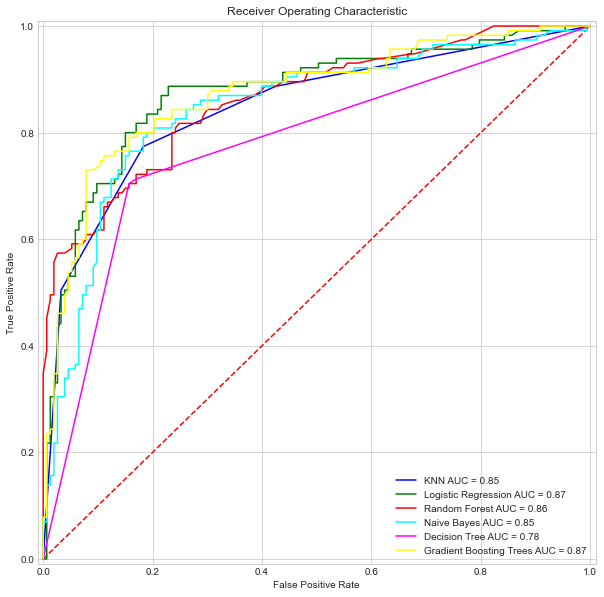

In [95]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

# 6. Hyperparameter Tuning

## 1. Grid Search

In [82]:
model = ensemble.GradientBoostingClassifier()
model

GradientBoostingClassifier()

### -> n_estimators 큰 값으로 하면 너무 오래걸려 작은 값으로 우선 하고, 나중에 적절한 값 대입

In [83]:
%%time
from sklearn.model_selection import GridSearchCV
random_state = 42
#grid 구성
param_grid={'learning_rate': np.logspace(-3, -1, 3),
            'max_depth':  np.linspace(5,100,8,dtype = int),
            'n_estimators': np.linspace(10,20,5, dtype=int),
            'random_state': [random_state]}

gs=GridSearchCV(model, param_grid, n_jobs=-1, cv=10, scoring='accuracy', verbose=False, refit=True)

gs.fit(x_train_transformed, y_train)

gs_test_score=round(metrics.accuracy_score(y_test, gs.predict(x_test_transformed)) * 100, 2)
print("Best accuracy {} params {}".format(gs.best_score_, gs.best_params_))

Best accuracy 0.8427291346646186 params {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10, 'random_state': 42}
Wall time: 19.2 s


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

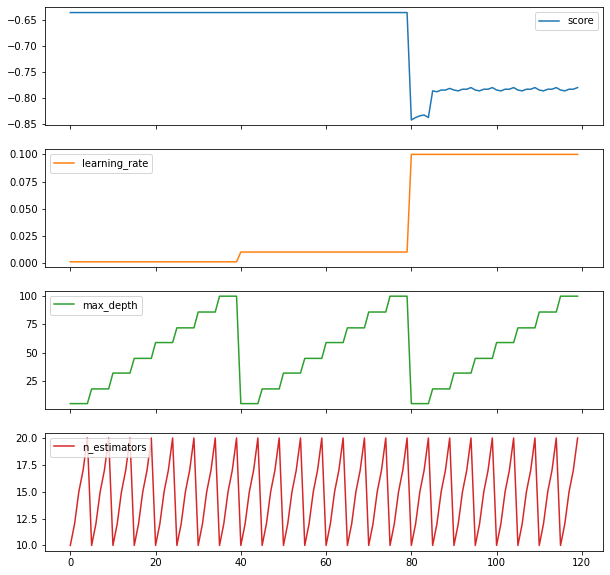

In [84]:
gs_results_df=pd.DataFrame(np.transpose([-gs.cv_results_['mean_test_score'],
                                         gs.cv_results_['param_learning_rate'].data,
                                         gs.cv_results_['param_max_depth'].data,
                                         gs.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
gs_results_df.plot(subplots=True,figsize=(10, 10))

In [85]:
# Grid Search Hyperparameter Tuning 결과에 따른 Parameter로 예측
params = {'n_estimators': 50,
          'max_depth': 5,
          'learning_rate': 0.1,
         'random_state': 42}
start_time = time.time()
gbc = ensemble.GradientBoostingClassifier(**params)
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(gbc,
                                                                 x_train_transformed, 
                                                                 y_train, 
                                                                 x_test_transformed, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 82.46
Accuracy CV 10-Fold: 82.99
Running Time: 0:00:00.251998


## 2. Random Search

In [86]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
n_iter=50

param_grid_rand={'learning_rate': np.logspace(-3, -1, 3),
                 'max_depth':  randint(2,50),
                 'n_estimators': randint(10,20),
                 'random_state': [random_state]}

rs=RandomizedSearchCV(model, param_grid_rand, n_iter = n_iter,
                n_jobs=-1, cv=10, verbose=False, random_state=random_state)

rs.fit(x_train_transformed, y_train)

rs_test_score=round(metrics.accuracy_score(y_test, rs.predict(x_test_transformed)) * 100, 2)
print("Best accuracy {} params {}".format(rs.best_score_, rs.best_params_))

Best accuracy 0.8459805427547364 params {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 14, 'random_state': 42}
Wall time: 7.97 s


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

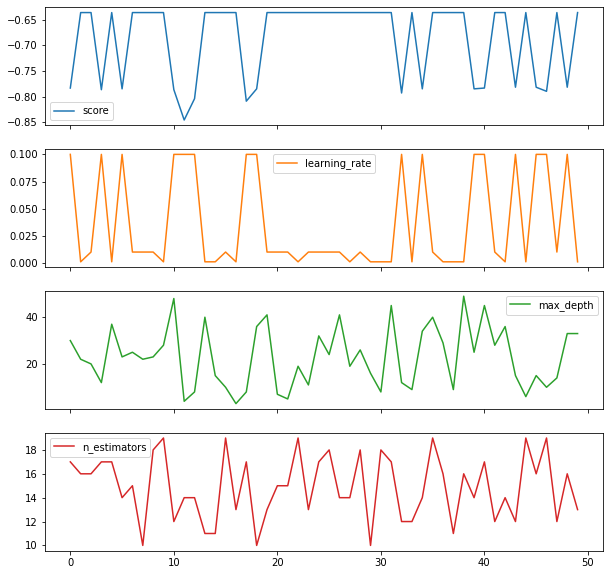

In [87]:
rs_results_df=pd.DataFrame(np.transpose([-rs.cv_results_['mean_test_score'],
                                         rs.cv_results_['param_learning_rate'].data,
                                         rs.cv_results_['param_max_depth'].data,
                                         rs.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
rs_results_df.plot(subplots=True,figsize=(10, 10))

In [88]:
# Random Search Hyperparameter Tuning 결과에 따른 Parameter로 예측
params = {'n_estimators': 100,
          'max_depth': 4,
          'learning_rate': 0.1,
         'random_state': 42}
start_time = time.time()
gbc = ensemble.GradientBoostingClassifier(**params)
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(gbc,
                                                                 x_train_transformed, 
                                                                 y_train, 
                                                                 x_test_transformed, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 83.96
Accuracy CV 10-Fold: 84.11
Running Time: 0:00:00.401999


## 8. Model Stacking

In [89]:
from sklearn.svm import SVC
from vecstack import StackingTransformer

In [90]:
# Initialize 1st level estimators

params = {'n_estimators': 505,
          'max_depth': 5,
          'learning_rate': 0.01,
         'random_state':42}
estimators = [ 
    ('LogisticRegression', linear_model.LogisticRegression()),
    ('GradientBoosting', ensemble.GradientBoostingClassifier(**params)),
    ('SVC', SVC(C=10, gamma=0.1, kernel='rbf'))]

In [91]:
# Initialize StackingTransformer

stack = StackingTransformer(estimators, 
                            regression = False, 
                            metric = accuracy_score, 
                            n_folds = 6, stratified = True, shuffle = True, 
                            random_state = 0, verbose = 2)

In [92]:
stack = stack.fit(x_train_transformed, y_train)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [3]

estimator  0: [LogisticRegression: LogisticRegression]
    fold  0:  [0.88461538]
    fold  1:  [0.78846154]
    fold  2:  [0.83653846]
    fold  3:  [0.86538462]
    fold  4:  [0.77884615]
    fold  5:  [0.85436893]
    ----
    MEAN:     [0.83470251] + [0.03890370]

estimator  1: [GradientBoosting: GradientBoostingClassifier]
    fold  0:  [0.87500000]
    fold  1:  [0.81730769]
    fold  2:  [0.82692308]
    fold  3:  [0.88461538]
    fold  4:  [0.83653846]
    fold  5:  [0.86407767]
    ----
    MEAN:     [0.85074371] + [0.02516821]

estimator  2: [SVC: SVC]
    fold  0:  [0.86538462]
    fold  1:  [0.81730769]
    fold  2:  [0.81730769]
    fold  3:  [0.82692308]
    fold  4:  [0.79807692]
    fold  5:  [0.83495146]
    ----
    MEAN:     [0.82665858] + [0.02065727]



In [93]:
# Get your stacked features

S_train = stack.transform(x_train_transformed)
S_test = stack.transform(x_test_transformed)

Train set was detected.
Transforming...

estimator  0: [LogisticRegression: LogisticRegression]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    model from fold  5: done
    ----
    DONE

estimator  1: [GradientBoosting: GradientBoostingClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    model from fold  5: done
    ----
    DONE

estimator  2: [SVC: SVC]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    model from fold  5: done
    ----
    DONE

Transforming...

estimator  0: [LogisticRegression: LogisticRegression]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    model from fold  5

In [94]:
# Use 2nd level estimator with stacked features

model_2 = linear_model.LogisticRegression() 
model_2 = model_2.fit(S_train, y_train) 

y_pred = model_2.predict(S_test) 
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.82835821]
